In [1]:
from molmap.model import RegressionEstimator, MultiClassEstimator, MultiLabelEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from molmap import dataset
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from molmap import MolMap
from molmap import feature
# 打开molmap的环境，molmap.model;molmap等宏包会自动导入到这个环境中。
# from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os
from tensorflow.keras.layers import Input,Dense, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model,Sequential
from joblib import load,dump #导入模型 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gpuid = "6"
os.environ["CUDA_VISIBLE_DEVICES"] = gpuid
physical_gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_gpus[0], True)

In [3]:
X1 = load('/raid/wx_home/learning/2_190w_model_new/pubchem_melucule3.data2')

In [4]:
X2 = X1[:10]

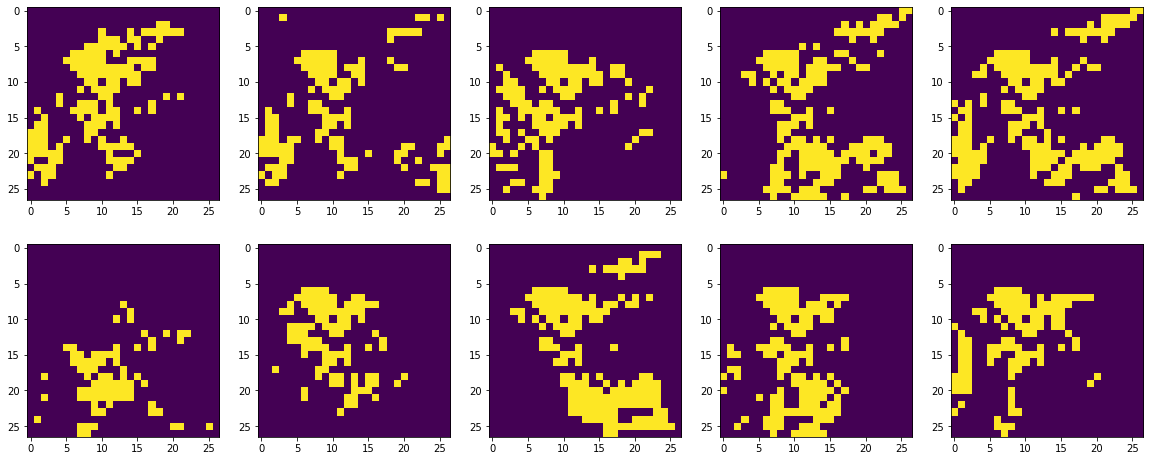

In [5]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(X2[i])

In [6]:
class Encoder(Model):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.d1 = Dense(2048, activation='relu')
        self.d2 = Dense(1024, activation='relu')
        self.d3 = Dense(512, activation='relu')
        self.d4 = Dense(128, activation='relu')
        self.d5 = Dense(64, activation='relu')
        self.d6 = Dense(32, activation='relu')
       
        self.d7 = Dense(8, activation='relu')
        self.d8 = Dense(3, activation='relu')

        
    def call(self,x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        x = self.d4(x)
        x = self.d5(x)
        x = self.d6(x)
        x = self.d7(x)
        return self.d8(x)       
    
    
class Decoder(Model):
    def __init__(self):
        super().__init__()
        self.d9 = Dense(8, activation='relu')
        self.d10 = Dense(32, activation='relu')
        self.d11 = Dense(64, activation='relu')
        self.d12 = Dense(128, activation='relu')
        self.d13 = Dense(512, activation='relu')
        self.d14 = Dense(1024, activation='relu')
        self.d15 = Dense(2048, activation='sigmoid')
        self.d16 = Dense(729, activation='relu')
        self.re = Reshape((27,27))
    
    def call(self,x):
        x = self.d9(x)
        x = self.d10(x)
        x = self.d11(x)
        x = self.d12(x)
        x = self.d13(x)
        x = self.d14(x)
        x = self.d15(x)
        x = self.d16(x)
        return  self.re(x)
        
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        
    def call(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [7]:
model = Autoencoder()

In [8]:
model.compile(optimizer='Adam',loss='mse')
history2 = model.fit(X1, X1, batch_size=768, epochs=10)

Epoch 1/10
2523/2523 [==============================] - 24s 9ms/step - loss: 0.1561
Epoch 2/10
2523/2523 [==============================] - 21s 8ms/step - loss: 0.1415
Epoch 3/10
2523/2523 [==============================] - 21s 8ms/step - loss: 0.1316
Epoch 4/10
2523/2523 [==============================] - 21s 8ms/step - loss: 0.1239
Epoch 5/10
2523/2523 [==============================] - 21s 8ms/step - loss: 0.1173
Epoch 6/10
2523/2523 [==============================] - 21s 8ms/step - loss: 0.1121
Epoch 7/10
2523/2523 [==============================] - 21s 8ms/step - loss: 0.1064
Epoch 8/10
2523/2523 [==============================] - 21s 8ms/step - loss: 0.1027
Epoch 9/10
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0998
Epoch 10/10
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0982


In [9]:
model.compile(optimizer='Adam',loss='mse')
history2 = model.fit(X1, X1, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 23s 8ms/step - loss: 0.0956
Epoch 2/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0947
Epoch 3/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0939
Epoch 4/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0936
Epoch 5/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0932
Epoch 6/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0945
Epoch 7/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0919
Epoch 8/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0907
Epoch 9/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0903
Epoch 10/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0899
Epoch 11/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0897
Epoch 12/100
2523/2523 [==============================] - 20s 8

<AxesSubplot:>

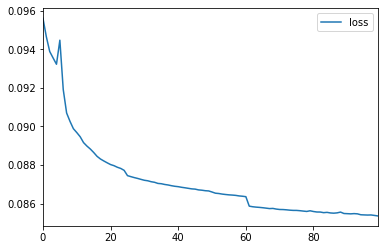

In [10]:
# pd.DataFrame(history1.history).plot()
pd.DataFrame(history2.history).plot()

In [11]:
model.compile(optimizer='Adam',loss='mse')
history1 = model.fit(X1, X1, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0854
Epoch 2/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0854
Epoch 3/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0853
Epoch 4/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0856
Epoch 5/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0854
Epoch 6/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0854
Epoch 7/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0854
Epoch 8/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0856
Epoch 9/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0854
Epoch 10/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0854
Epoch 11/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0853
Epoch 12/100
2523/2523 [==============================] - 21s 8

<AxesSubplot:>

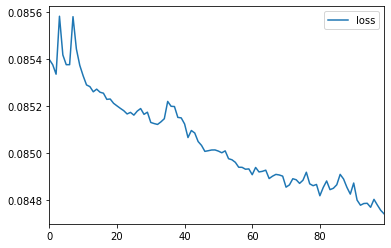

In [12]:
pd.DataFrame(history1.history).plot()

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy')
history1 = model.fit(X1, X1, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 25s 10ms/step - loss: 0.9681
Epoch 2/100
2523/2523 [==============================] - 24s 9ms/step - loss: 0.9674
Epoch 3/100
2523/2523 [==============================] - 24s 10ms/step - loss: 0.9625
Epoch 4/100
2523/2523 [==============================] - 24s 9ms/step - loss: 0.9473
Epoch 5/100
2523/2523 [==============================] - 23s 9ms/step - loss: 0.9318
Epoch 6/100
2523/2523 [==============================] - 23s 9ms/step - loss: 0.9885
Epoch 7/100
2523/2523 [==============================] - 24s 9ms/step - loss: 0.9927
Epoch 8/100
2523/2523 [==============================] - 24s 9ms/step - loss: 1.0139
Epoch 9/100
2523/2523 [==============================] - 24s 9ms/step - loss: 1.0687
Epoch 10/100
2523/2523 [==============================] - 24s 9ms/step - loss: 1.0662
Epoch 11/100
2523/2523 [==============================] - 23s 9ms/step - loss: 1.0701
Epoch 12/100
2523/2523 [==============================] - 23s

In [13]:
y_pre = model.predict(X1[:10])

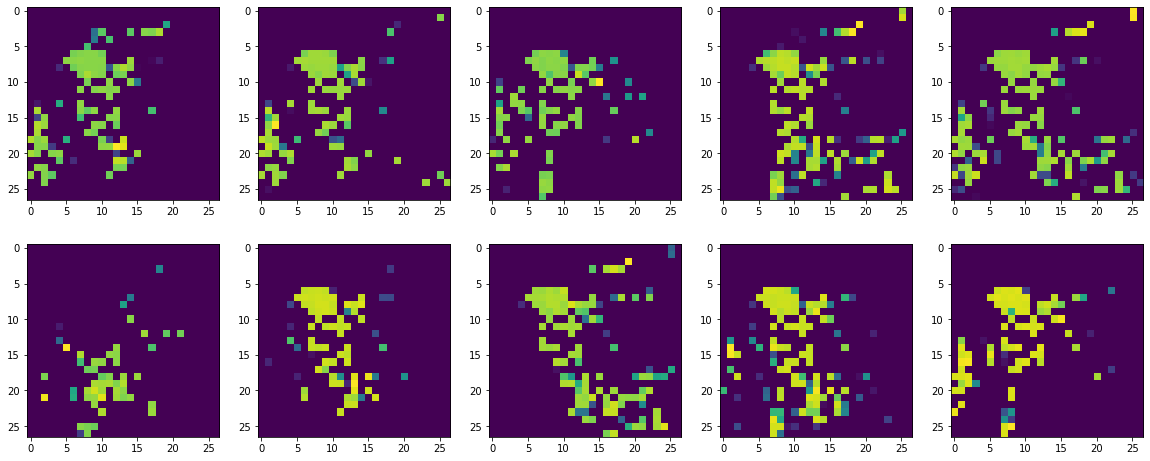

In [14]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(y_pre[i])

In [15]:
model.save('test_8_model')

In [16]:
X3 = model.encoder(X1[:200000])

In [18]:
from keras.backend import set_session
from keras.backend import clear_session
from keras.backend import get_session
import tensorflow as tf
import gc
 
# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()
 
    try:
        del classifier # this is from global space - change this as you need
    except:
        pass
 
    print(gc.collect()) # if it does something you should see a number as output
 
    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tf.compat.v1.Session(config=config))

In [20]:
reset_keras()

100


In [21]:
X3

<tf.Tensor: shape=(200000, 3), dtype=float32, numpy=
array([[23.559963  ,  1.5813736 , 18.736006  ],
       [21.266815  ,  4.81128   , 22.096216  ],
       [ 9.257794  ,  4.5758705 ,  6.165988  ],
       ...,
       [ 7.719475  ,  2.6234515 ,  3.4616485 ],
       [ 8.477206  ,  0.82567596,  5.8805447 ],
       [81.14891   , 13.809793  , 75.26667   ]], dtype=float32)>

In [22]:
X6 = model.encoder(X1[200000:400000])
reset_keras()
X7 = model.encoder(X1[400000:600000])
reset_keras()
X8 = model.encoder(X1[600000:800000])
reset_keras()
X9 = model.encoder(X1[800000:1000000])
reset_keras()
X10 = model.encoder(X1[1000000:1200000])
reset_keras()
X11 = model.encoder(X1[1200000:1400000])
reset_keras()
X12 = model.encoder(X1[1400000:1600000])
reset_keras()
X13 = model.encoder(X1[1600000:1800000])
reset_keras()
X14 = model.encoder(X1[1800000:2000000])

100
100
100
100
100
100
100
100


In [23]:
dump(X3, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/1-200000')
dump(X6, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/200000-400000')
dump(X7, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/400000-600000')
dump(X8, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/600000-800000')
dump(X9, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/800000-1000000')
dump(X10, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/1000000-1200000')
dump(X11, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/1200000-1400000')
dump(X12, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/1400000-1600000')
dump(X13, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/1600000-1800000')
dump(X14, '/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/1800000-2000000')

['/raid/wx_home/learning/2_190w_model_new/parameter_adjust/test8_data/1800000-2000000']